In [1]:
import sklearn
from sklearn.tree import LinearDecisionTreeRegressor as ldtr
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
df= pd.read_excel('./Concrete/Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [6]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
X = np.array(df.drop(['Concrete compressive strength(MPa, megapascals) '], axis= 1))
#X = X[:, [0, 2, 6]]
y = np.array(df['Concrete compressive strength(MPa, megapascals) '])


X= scaler.fit_transform(X)

# indices = X[:, 4] > -1
# y= y[indices]
# X= X[indices]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

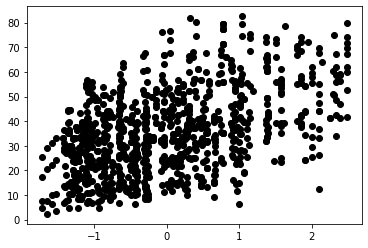

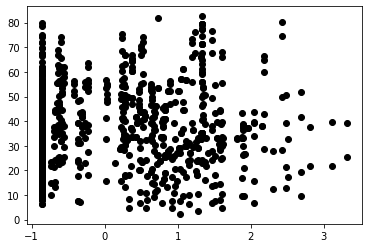

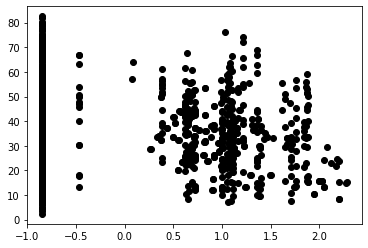

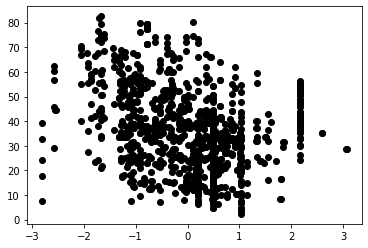

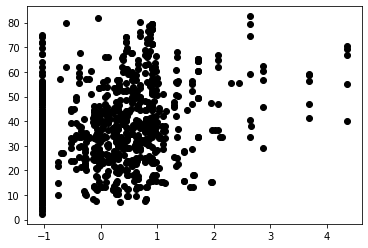

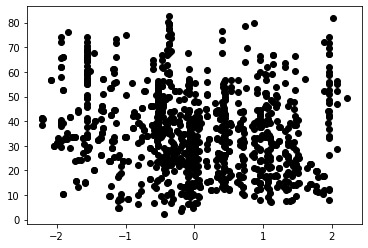

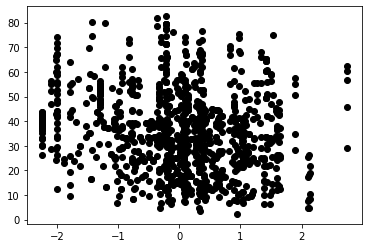

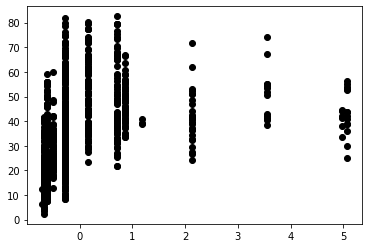

In [8]:
for i in range(X_train.shape[1]):
    plt.scatter(X[:, i], y,  color='black')
    plt.show()

In [9]:
X

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [10]:
print(type(X_train))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(824, 8)
(206, 8)
(824,)
(206,)


In [17]:
reg1 = ldtr(max_depth= 2)
reg2 = LinearRegression(n_jobs = -1)
reg3 = LinearSVR()
reg4 = SVR(kernel = 'rbf')
reg5 = DecisionTreeRegressor(max_depth = 3)
reg6 = Lasso()
reg7 = RandomForestRegressor(max_depth = 3,n_jobs = -1)

In [18]:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
reg4.fit(X_train, y_train)
reg5.fit(X_train, y_train)
reg6.fit(X_train, y_train)
reg7.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_jobs=-1)

In [19]:
reg2.coef_

array([11.81145301,  8.1710605 ,  5.2186352 , -3.60043066,  1.51251109,
        0.63304072,  0.79704363,  7.17975582])

In [20]:
y_pred1 = reg1.predict(X_test)
y_pred2 = reg2.predict(X_test)
y_pred3 = reg3.predict(X_test)
y_pred4 = reg4.predict(X_test)
y_pred5 = reg5.predict(X_test)
y_pred6 = reg6.predict(X_test)
y_pred7 = reg7.predict(X_test)

In [21]:
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred1))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred2))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred3))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred4))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred5))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred6))
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred7))

Mean squared error: 42.69
Mean squared error: 98.93
Mean squared error: 103.82
Mean squared error: 84.59
Mean squared error: 109.45
Mean squared error: 114.70
Mean squared error: 90.08


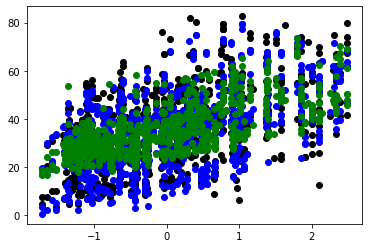

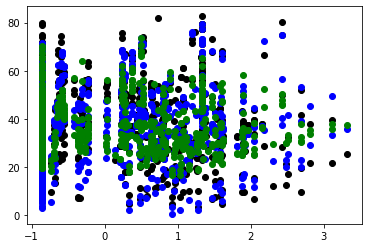

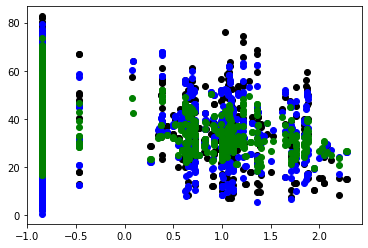

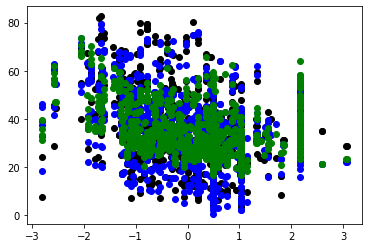

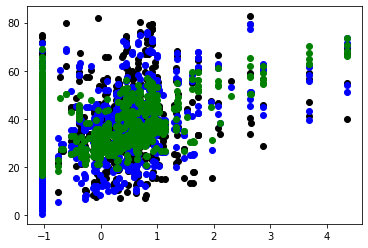

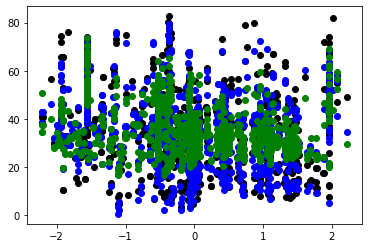

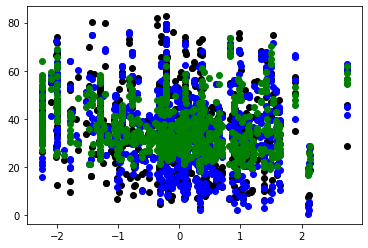

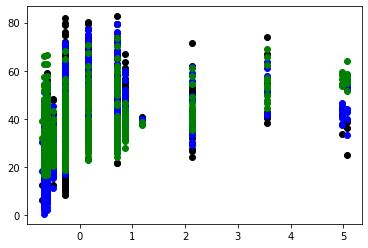

In [22]:
for i in range(X_train.shape[1]):
    plt.scatter(X_train[:, i], y_train,  color='black')
    plt.scatter(X_train[:, i], reg1.predict(X_train),  color='blue')
    plt.scatter(X_train[:, i], reg6.predict(X_train),  color='green')
    plt.show()

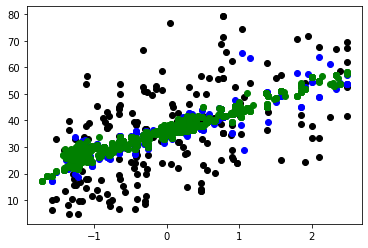

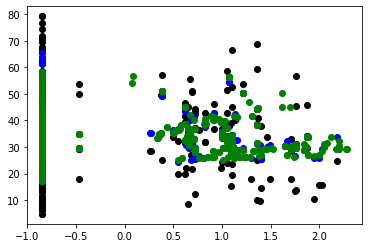

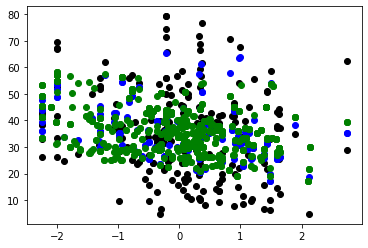

In [61]:
for i in range(X_train.shape[1]):
    plt.scatter(X_test[:, i], y_test,  color='black')
    plt.scatter(X_test[:, i], reg1.predict(X_test),  color='blue')
    plt.scatter(X_train[:, i], reg2.predict(X_train),  color='green')
    plt.show()

In [18]:
np.sum(np.array([1, 2]) * np.array([1, 2]))

5

In [19]:
%%time
reg1.fit(X_train, y_train)

Wall time: 953 ms


LinearDecisionTreeRegressor(max_depth=3)